# Week-09 Homework

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
belize_listings = "A:/launch_code_STL/Final_Homework/week-4/belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings)

In [62]:
belize_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.0,5,225


In [63]:
belize_df.tail(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2795,48332221,Standard Room - San Ignacio Resort Hotel,60399527,San Ignacio,Cayo,Cayo,17.154127,-89.069689,Private room,226,1,0,NaN,NaN,5,365


In [6]:
sample = belize_df.describe()
sample

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.796000e+03,2.796000e+03,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,1810.000000,2796.000000,2796.000000
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
min,3.666600e+04,1.507890e+05,16.079260,-89.150680,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.870854e+07,4.389292e+07,17.129573,-88.371015,135.000000,1.000000,0.000000,0.110000,2.000000,221.000000
50%,2.891586e+07,9.171577e+07,17.735145,-88.205560,220.000000,2.000000,2.000000,0.275000,6.000000,349.000000
75%,3.977962e+07,1.875677e+08,17.913837,-87.973793,394.250000,3.000000,13.000000,0.700000,14.000000,364.000000
max,4.833222e+07,3.890334e+08,18.468140,-87.593140,11788.000000,180.000000,316.000000,5.920000,204.000000,365.000000


#### 1. Why is assuming normal data an important consideration when answering questions about probability?

The most frequently used and important distribution in statistics is the normal distribution. Most of the patterns in nature 
can be modeled using normal distribution.  As the mean, median and mode are closely distributed helps in calculating the probabilities.
Normal distributions are generally symetric bell shaped, with equal values of  mean and median located in the center and 
it follows 68, 95, 99.7 rule. 


#### 2.Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 


In [13]:
#  The final bin count is obtained from np.round(np.ceil(range / h)), here h is the bin width.
bin_reviews_per_month = int(np.ceil(np.log2(len(belize_df['reviews_per_month'])))+1)
bin_number_of_reviews = int(np.ceil(np.log2(len(belize_df['number_of_reviews'])))+1)

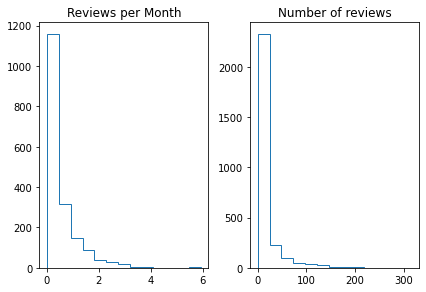

In [21]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()

ax[0].hist(belize_df['reviews_per_month'], bins=bin_reviews_per_month, histtype = 'step')
ax[0].set_title('Reviews per Month')

ax[1].hist(belize_df['number_of_reviews'], bins=bin_number_of_reviews, histtype = 'step')
ax[1].set_title('Number of reviews')

plt.show()

#### a.How do you choose your bin size?

 To get a good bin size value for the small dataset like Belize Airbnb, 'Sturges' value is recommended whereas for the large
datasets FD(Freedman Diaconis Estimator) is prefered.

A bin size is usually preferred for sorting the data in histogram and gives some very good information about the data.

There are some rules to be followed to choose the bin size as:
1.Bins must be represented with the same size, e.g,groups of tens.
2.All the data including the outliers must be included withih the bins
3.To make it easy to understand we need to include the bin boundaries and that should be whole numbers and try to workout with 5 to 20 bins not more than that.

#### 3.Create a box and whisker plot for availability_365. What does this show you

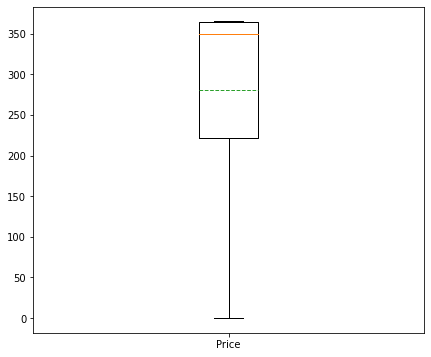

In [9]:
plt.figure(figsize=(7,6))
plt.boxplot(belize_df['availability_365'], sym='', whis=[0, 100], showmeans=True, meanline=True, labels=['Price'])
plt.show()

from this plot we can observe that the mean of availability_365 is around 280, and no outliers beyond avaiability after 365 days

#### 4.What is the probability that the price for an Airbnb is under Dollar 50?


In [141]:
#Subset belize_df to get the rows where price under 50

price_50 = belize_df[belize_df['price'] < 50]
price_50

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115
341,10857678,Gecko Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03210,-88.51931,Private room,28,7,1,3/5/2020,0.08,9,218
343,11010397,Tree Frog Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03278,-88.51718,Private room,28,7,2,4/23/2019,0.08,9,218
344,11015225,Fern Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03380,-88.51922,Private room,28,7,7,2/15/2020,0.19,9,218
346,11057764,Jacamar Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03246,-88.51903,Private room,28,7,3,12/24/2019,0.08,9,218


In [73]:
x=belize_df['price'].count()
x

2796

In [53]:
price_50.count()

id                                49
name                              49
host_id                           49
host_name                         49
neighbourhood_group               49
neighbourhood                     49
latitude                          49
longitude                         49
room_type                         49
price                             49
minimum_nights                    49
number_of_reviews                 49
last_review                       41
reviews_per_month                 41
calculated_host_listings_count    49
availability_365                  49
dtype: int64

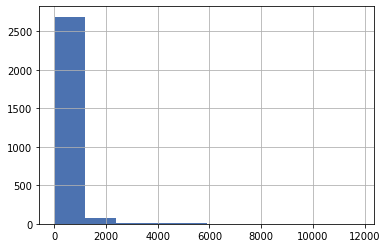

In [54]:
belize_df['price'].hist()
plt.show()

In [8]:
print(np.mean(belize_df['price']))
print(np.std(belize_df['price']))

357.1022889842632
563.0241137172479


In [144]:
prob_under_50 = stats.norm.cdf(x = 50, loc = 357, scale = 563)
prob_under_50

0.2927759838151833

In [68]:
1 - stats.norm.cdf(50, 375, 563)

0.7181196563162818

In [38]:
stats.norm.cdf(920, 357, 563) - stats.norm.cdf(-206, 357, 563)  

0.6826894921370859

In [39]:
stats.norm.cdf(1483, 357, 563) - stats.norm.cdf(-769, 357, 563)

0.9544997361036416

In [40]:
stats.norm.cdf(2046, 357, 563) - stats.norm.cdf(-1332, 357, 563)

0.9973002039367398

 4. The probability of price under $50 is 29.2%

#### a.What do you notice about these records? Hint: look at the other columns.
    

 

From my observation, there are almost 8 missing values for columns last_review and reviews_per_month, and there are 
no missing values found in price column. Also, the data in the price column seems to be continuous.

#### b.What distribution does this data most closely fit?

It fits a normal distribution as this data satisfies the 68, 95, and 99.7 probability rule i.e., 68% of the price
falls within one standard deviation of the mean, 95% of the price falls within two standard deviations of the mean, 
and 99.7% of the price falls within 3 standard deviations of the mean.

#### 5.Calculate the sample variance and standard deviation for all the numerical columns in the same output.

#### a.Why sample variance and not population variance?


As described in the lecture series, population variance under reports the variance measure while the sample variance 
provides the unbiased measure of variance. Hence, we use sample variance instead of population variance.

In [13]:
belize_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.796000e+03,2.796000e+03,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,1810.000000,2796.000000,2796.000000
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
min,3.666600e+04,1.507890e+05,16.079260,-89.150680,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.870854e+07,4.389292e+07,17.129573,-88.371015,135.000000,1.000000,0.000000,0.110000,2.000000,221.000000
50%,2.891586e+07,9.171577e+07,17.735145,-88.205560,220.000000,2.000000,2.000000,0.275000,6.000000,349.000000
75%,3.977962e+07,1.875677e+08,17.913837,-87.973793,394.250000,3.000000,13.000000,0.700000,14.000000,364.000000
max,4.833222e+07,3.890334e+08,18.468140,-87.593140,11788.000000,180.000000,316.000000,5.920000,204.000000,365.000000


In [20]:
airbnb = belize_df[['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
airbnb

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,157752,17.747860,-88.023980,141,3,250,2.00,5,225
1,36690,157752,17.748320,-88.024740,71,3,316,2.46,5,164
2,108932,563377,17.732210,-88.038240,191,2,30,0.78,1,364
3,110483,567809,16.521140,-88.369260,121,1,27,0.29,3,331
4,120115,604999,17.741660,-88.023950,343,1,30,0.64,22,203
...,...,...,...,...,...,...,...,...,...,...
2791,48283996,17994012,17.945690,-87.944620,1054,3,0,NaN,2,347
2792,48287613,375769845,18.374630,-88.400190,401,3,0,NaN,2,302
2793,48296096,76414486,17.934580,-87.955220,252,1,0,NaN,204,364
2794,48296978,15308338,17.930010,-87.957120,242,3,0,NaN,4,364


In [52]:
print('Standard Deviation:', np.std(airbnb, ddof=1))

Standard Deviation: id                                1.288964e+07
host_id                           1.018001e+08
latitude                          5.374396e-01
longitude                         3.838760e-01
price                             5.631248e+02
minimum_nights                    5.669843e+00
number_of_reviews                 3.032777e+01
reviews_per_month                 6.621542e-01
calculated_host_listings_count    5.171118e+01
availability_365                  1.206176e+02
dtype: float64


In [46]:
print('Sample variance:', np.var(airbnb, ddof=1))

Sample variance: id                                1.661428e+14
host_id                           1.036327e+16
latitude                          2.888413e-01
longitude                         1.473608e-01
price                             3.171096e+05
minimum_nights                    3.214712e+01
number_of_reviews                 9.197735e+02
reviews_per_month                 4.384482e-01
calculated_host_listings_count    2.674046e+03
availability_365                  1.454861e+04
dtype: float64


In [47]:
print('Population variance:', np.var(airbnb))

Population variance: id                                1.660834e+14
host_id                           1.035956e+16
latitude                          2.887380e-01
longitude                         1.473081e-01
price                             3.169962e+05
minimum_nights                    3.213562e+01
number_of_reviews                 9.194445e+02
reviews_per_month                 4.382060e-01
calculated_host_listings_count    2.673090e+03
availability_365                  1.454341e+04
dtype: float64


#### b.What is your takeaway for each metric?

From the above inference, i have observed that the sample variance values for all the numerical columns are slightly
higher when compared to the population variance.

#### c.What are the scales of measurement for each of these values? 

the scales of measurement for each of these above values:

The units of variance are squared, for example In price column (as this belize dataset is for US the price) is measured as
3.17 (dollar square) for standard deviation it is easy to calculate the units since they are not squared eg., price 5.63($)

#### 6.What percent of Airbnb listings in Belize are available 360 days a year or more?

#### a.360 days or less?

#### b.What distribution does this data most closely fit?


In [14]:
print(np.mean(belize_df['availability_365']))
print(np.std(belize_df['availability_365']))

280.31545064377684
120.59606042441814


In [32]:
#6.A) 25.4% of the listings are available 360 days or more
1 - stats.norm.cdf(360, 280.31, 120.59)

0.25435931362414266

In [33]:
#6.A) 74.6% of the listings are available 360 days or less 
stats.norm.cdf(360, 280.31, 120.59)

0.7456406863758573

In [34]:
stats.norm.cdf(400, 280.31, 120.59) - stats.norm.cdf(160, 280.31, 120.59)  

0.6803143635195861

In [35]:
stats.norm.cdf(520, 280.31, 120.59) - stats.norm.cdf(40, 280.31, 120.59)  

0.9534319947413665

In [34]:
stats.norm.cdf(640, 280.31, 120.59) - stats.norm.cdf(-80, 280.31, 120.59)
#6.B) As seen from the above claculations, we can infer that the distribution obeys the Normal Distributions, as it fits 68, 95 and 99.7% rule.

0.9971671106485799

#### 7.What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [25]:
print(np.mean(belize_df['minimum_nights']))
print(np.std(belize_df['minimum_nights']))

2.263948497854077
5.668829197161378


In [28]:
# Followed the datacamp, came out with this approach using mean and standard deviation
from scipy.stats import norm
pct_75 = norm.ppf((1-0.75), 2.26, 5.66)
pct_75

-1.5576119861098228

In [10]:
# From group discussion i, learnt a new approach using np.percentile().
pct_75 = np.percentile(belize_df["minimum_nights"], 25)
pct_75

1.0

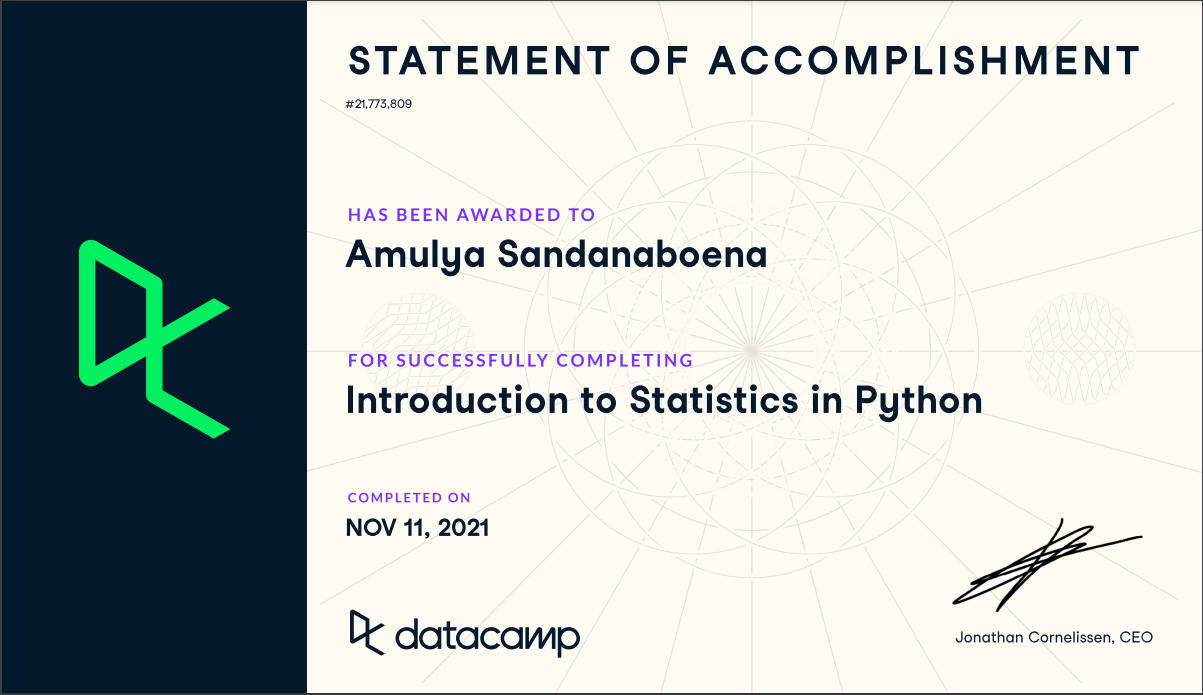